In [1]:
import importlib
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
from multi_loc import covariance, assimilate

In [3]:
%matplotlib inline

In [4]:
def imshow(X, title=None, vmin=None, vmax=None, cmap=None):
    plt.figure()
    im = plt.imshow(X, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.colorbar(im)
    plt.title(title)

In [97]:
dimension = 2**6
rho0 = 5
dx = 1
H = np.eye(dimension)[::2]
y_size = H.shape[0]

rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
rho = rho*dx

In [149]:
eig_val, eig_vec, P, sort_ind = covariance.generate_circulant(
    dimension, dx, rho0, covariance.fft_exp_1d,
    return_Corr=True,
    return_sort_ind=True)
eig_val = eig_val * (eig_val.size/eig_val.sum())
# eig_vec = eig_vec.real + eig_vec.imag
# sort_ind = np.argsort(sort_ind)
# eig_val = eig_val[sort_ind]
# eig_vec = eig_vec[:, sort_ind]
P = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T
P = P.real

R = np.eye(y_size)

trans_mats = assimilate.transformation_matrices(
    H, eig_val_p=eig_val, eig_vec_p=eig_vec,
    R=R, return_Ts=True)

for key, val in trans_mats.items():
    exec(key + '=val')

# P_sqrt, P_inv_sqrt = returned[:2]
# R_sqrt, R_inv_sqrt = returned[2:4]
# U, S, VT = returned[4:7]
# Tx, Tx_inv, Ty, Ty_inv = returned[7:]

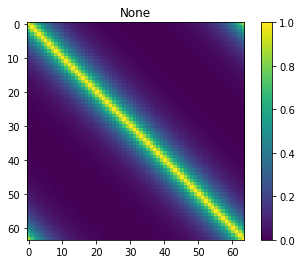

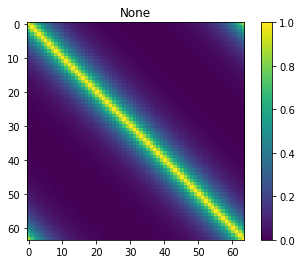

In [150]:
imshow(P, vmin=0)
imshow((eig_vec @ np.diag(eig_val) @ eig_vec.conj().T).real, vmin=0)

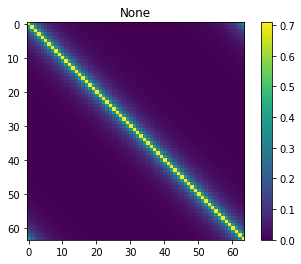

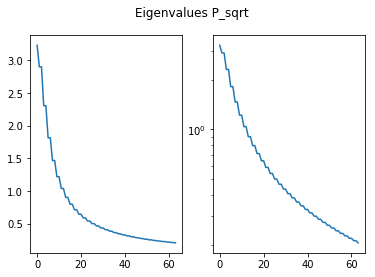

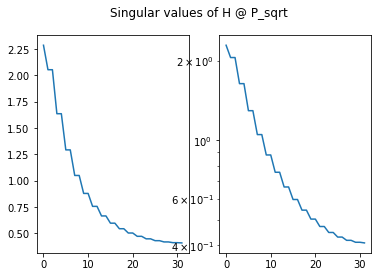

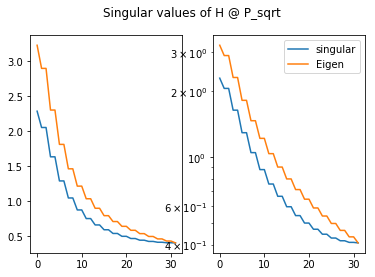

In [151]:
imshow(P_sqrt, vmin=0)

fig, ax = plt.subplots(1, 2)
ax[0].plot(np.sqrt(eig_val))
ax[1].semilogy(np.sqrt(eig_val))
plt.suptitle('Eigenvalues P_sqrt')

fig, ax = plt.subplots(1, 2)
ax[0].plot(np.diag(S))
ax[1].semilogy(np.diag(S))
plt.suptitle('Singular values of H @ P_sqrt')


fig, ax = plt.subplots(1, 2)
ax[0].plot(np.diag(S))
ax[0].plot(np.sqrt(eig_val[:int(dimension/2)]))
ax[1].semilogy(np.diag(S))
ax[1].semilogy(np.sqrt(eig_val[:int(dimension/2)]))
plt.suptitle('Singular values of H @ P_sqrt')
plt.legend(['singular', 'Eigen'])

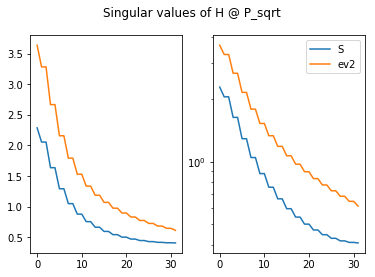

In [162]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(np.diag(S))
ax[0].plot(eig_val2)
ax[1].semilogy(np.diag(S))
ax[1].semilogy(eig_val2)
plt.suptitle('Singular values of H @ P_sqrt')
plt.legend(['S', 'ev2'])

In [153]:
%matplotlib inline

In [161]:
half = round(dimension/2)
eig_val2 = np.sqrt(eig_val[:half]) + np.sqrt(eig_val[half:])

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


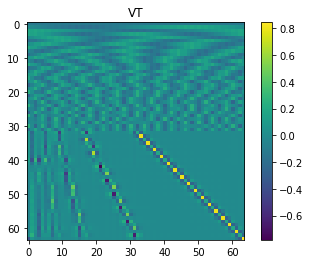

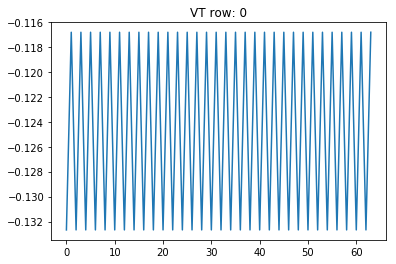

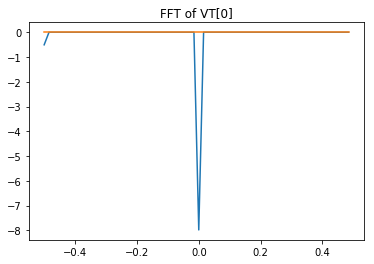

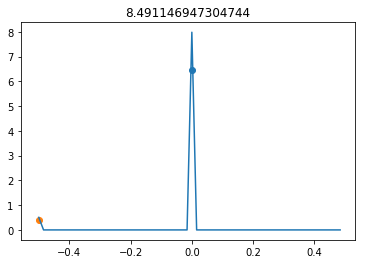

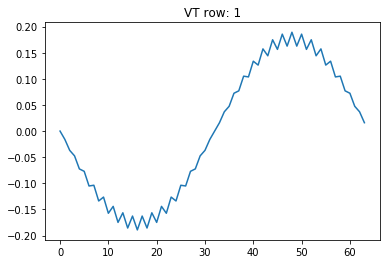

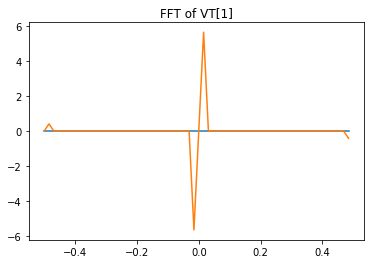

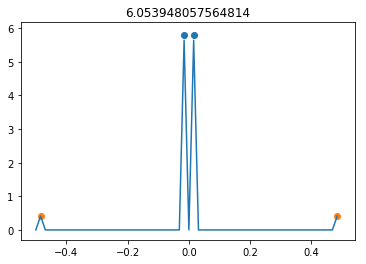

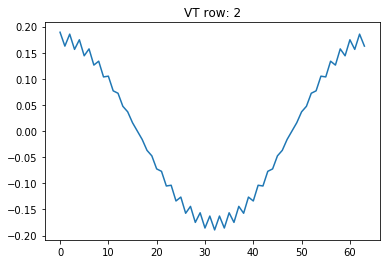

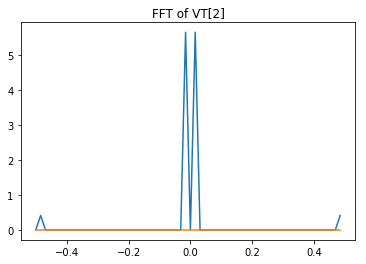

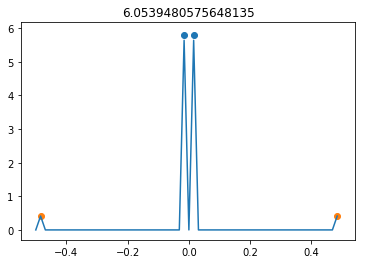

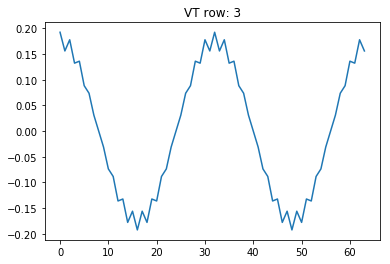

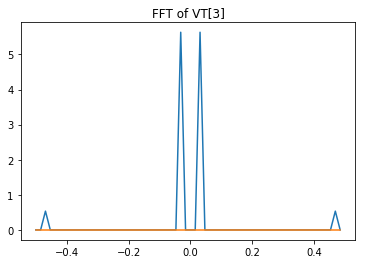

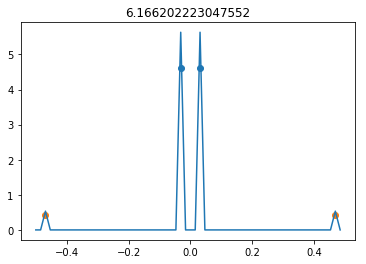

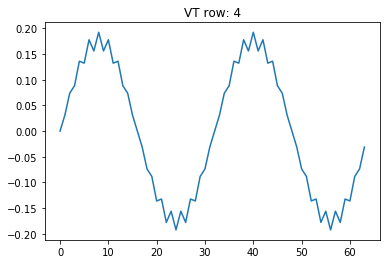

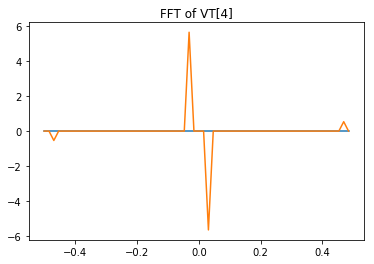

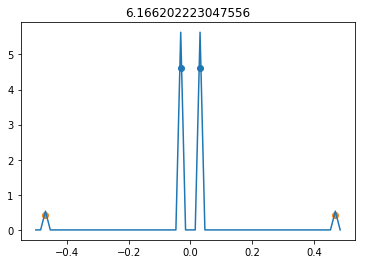

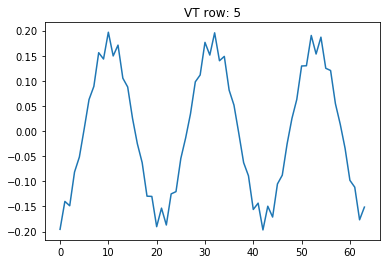

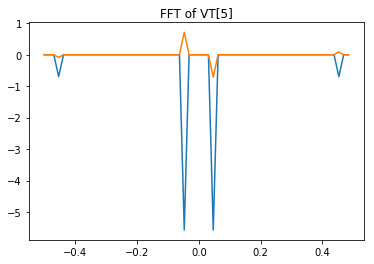

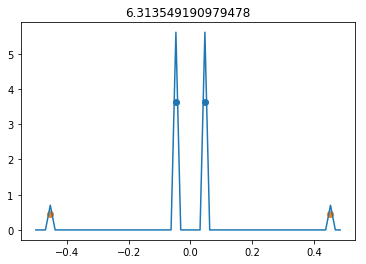

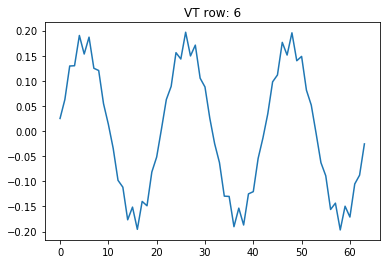

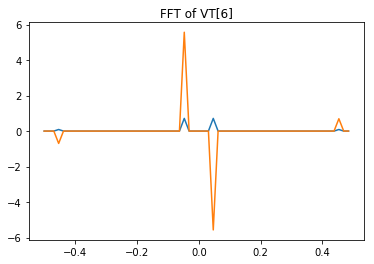

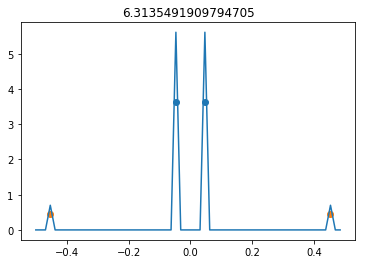

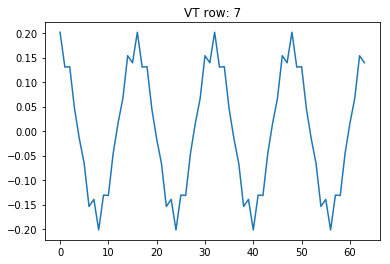

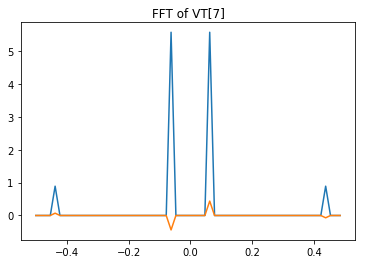

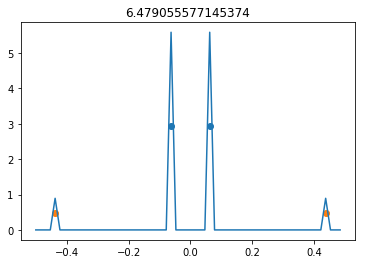

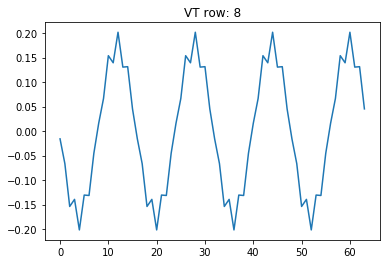

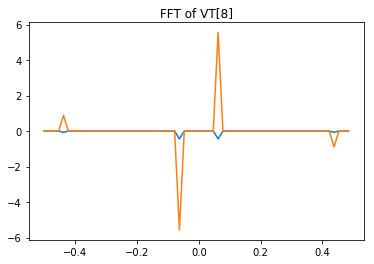

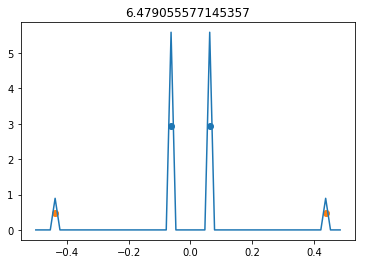

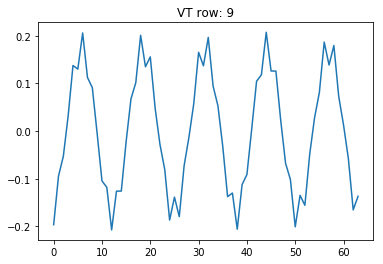

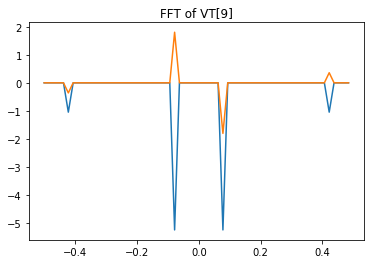

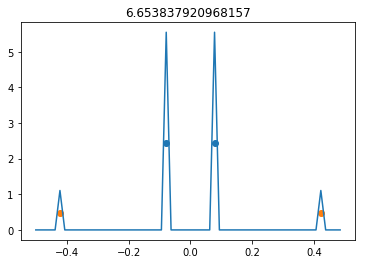

In [171]:
num_u = int(dimension/2)
# num_v = dimension
num_v = 10


k = covariance.return_waves(dimension)
k = np.fft.fftshift(k)
k = k/(dimension * dx)

# U_til = H @ eig_vec[:, :round(dimension/2)]

# imshow(U, 'U')
# imshow(eig_vec, 'eig_vec')

# for ii in range(num_u):   
#     plt.figure()
#     plt.plot(U[:, ii])
#     plt.title(f'U row: {ii}')
    
#     u_fft = np.fft.fft(U[:, ii])
#     plt.figure()
#     plt.plot(u_fft.real)
#     plt.plot(u_fft.imag)
#     plt.title(f'FFT U row: {ii}')
    
#     this = eig_vec[:, ii]
#     plt.figure()
#     plt.plot(this)
#     plt.title(f'eig_vec row: {ii}')
    
#     u_fft = np.fft.fft(this)
#     plt.figure()
#     plt.plot(u_fft.real)
#     plt.plot(u_fft.imag)
#     plt.title(f'FFT eig_vec row: {ii}')


imshow(VT, 'VT')

for ii in range(round(num_v)):
    plt.figure()
    plt.plot(VT[ii])
    plt.title(f'VT row: {ii}')
    
    v_fft = np.fft.fft(VT[ii])
    v_fft = np.fft.fftshift(v_fft)
    plt.figure()
    plt.plot(k, v_fft.real)
    plt.plot(k, v_fft.imag)
    plt.title(f'FFT of VT[{ii}]')
    
    plt.figure()
    plt.plot(k, np.abs(v_fft))
    plt.title(f'Absolute FFT of VT[{ii}]')
    
    tol = 1e-5
    fft_max = np.abs(v_fft).max()
    max_ind = np.where(np.abs(v_fft) > (fft_max - tol))[0]
    this_sum = np.abs(v_fft).sum()/len(max_ind)
    
    plt.scatter(k[max_ind],
                np.repeat(np.sqrt(eig_val[ii]), len(max_ind))*2)
    plt.scatter(k[max_ind] - np.sign(k[max_ind] + 1e-10)/(2 * dx),
                np.repeat(np.sqrt(eig_val[-(ii + 1)]), len(max_ind))*2)
    plt.title(this_sum)
    
#     this = eig_vec[:, ii]
#     plt.figure()
#     plt.plot(this)
#     plt.title(f'eig_vec row: {ii}')
    
#     u_fft = np.fft.fft(this)
#     u_fft = np.fft.fftshift(u_fft)
#     plt.figure()
#     plt.plot(k, u_fft.real)
#     plt.plot(k, u_fft.imag)
#     plt.title(f'FFT eig_vec row: {ii}')
    
    

In [178]:
(1/np.sqrt(dimension))**2*dimension

1.0

In [179]:
1/np.sqrt(dimension)*dimension/2

4.0

In [61]:
v_fft.real

array([ 2.08166817e-16,  3.01050785e-16, -7.84167841e-01, -5.75965779e-16,
       -2.55351296e-15, -6.20651980e-16, -2.28794679e+00,  2.29433160e-16,
        1.38777878e-17,  2.29433160e-16, -2.28794679e+00, -6.20651980e-16,
       -2.55351296e-15, -5.75965779e-16, -7.84167841e-01,  3.01050785e-16])

In [62]:
np.abs(v_fft.real).max()

2.287946794307725

In [83]:
(max_ind - dimension/2)/(dx * dimension)

array([-0.0625,  0.0625])

In [81]:
sort_ind = np.abs(v_fft).argsort()[::-1]
tol = 0.01
fft_max = np.abs(v_fft).max()
max_ind = np.where(np.abs(v_fft) > (fft_max - tol))[0]
print(v_fft[max_ind])

k[np.abs(v_fft).argsort()[::-1]]

[ 9.95460774e-16+2.7929497j -2.27969715e-15-2.7929497j]


array([ 0.0625, -0.0625,  0.4375, -0.4375,  0.1875,  0.3125, -0.3125,
        0.375 , -0.375 , -0.125 ,  0.125 ,  0.25  , -0.25  , -0.5   ,
       -0.1875,  0.    ])

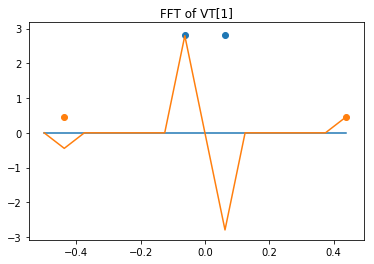

In [94]:
ii = 1
v_fft = np.fft.fft(VT[ii])
v_fft = np.fft.fftshift(v_fft)
plt.figure()
plt.plot(k, v_fft.real)
plt.plot(k, v_fft.imag)
plt.title(f'FFT of VT[{ii}]')

tol = 1e-5
fft_max = np.abs(v_fft).max()
max_ind = np.where(np.abs(v_fft) > (fft_max - tol))[0]
plt.scatter(k[max_ind], np.repeat(np.sqrt(eig_val[ii]), len(max_ind))*2)
plt.scatter(k[max_ind] - np.sign(k[max_ind])/(2 * dx), np.repeat(np.sqrt(eig_val[-(ii + 1)]), len(max_ind))*2)

# plt.scatter(ii/(dx * dimension), -eig_val[ii])
# plt.scatter(ii/(dx * dimension) - 1/(2*dx), -eig_val[-(ii + 1)])

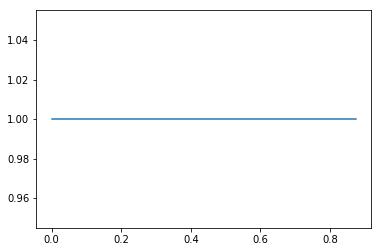

In [41]:
x = np.arange(16)/16
x = x[::2]
f = -8
y = np.cos(2* np.pi * x * f)
plt.figure()
plt.plot(x, y)

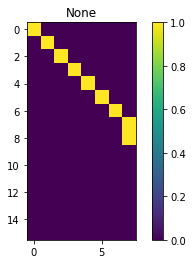

In [13]:
selection = np.eye(dimension)
selection = selection[:, :int(dimension/2)]
selection[int(dimension/2), int(dimension/2) - 1] = 1
imshow(selection)

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


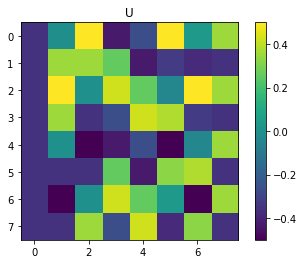

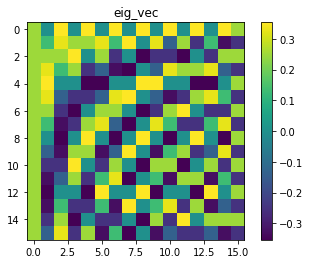

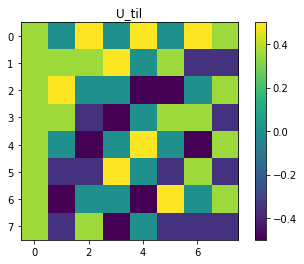

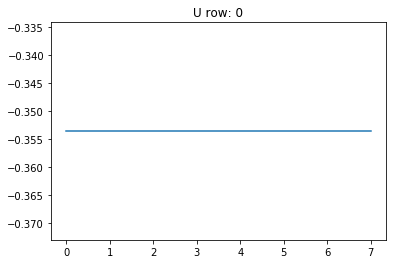

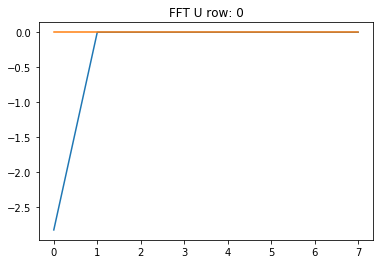

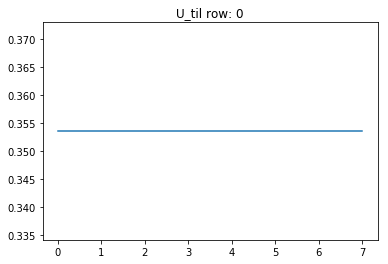

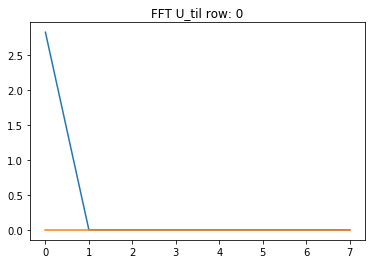

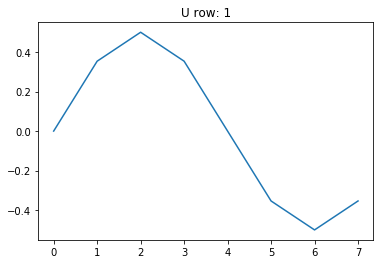

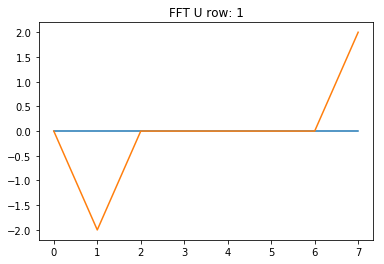

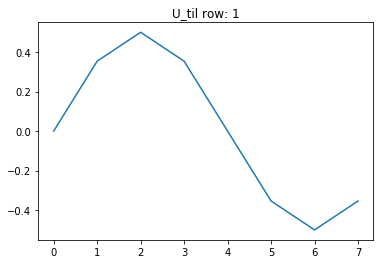

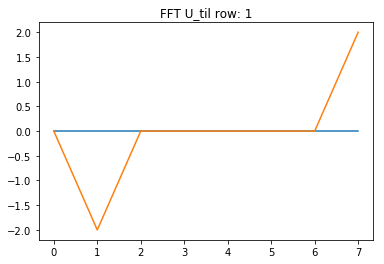

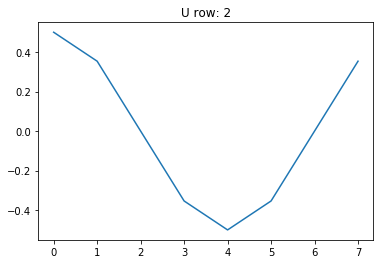

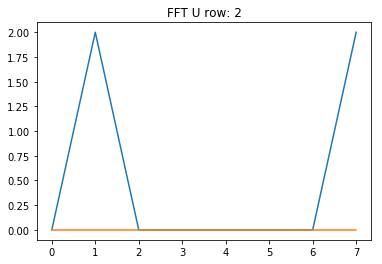

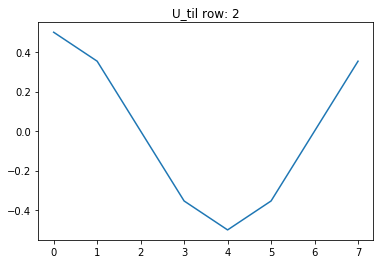

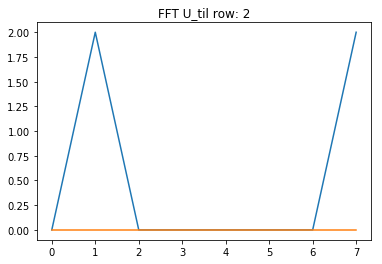

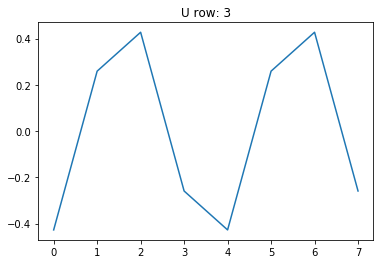

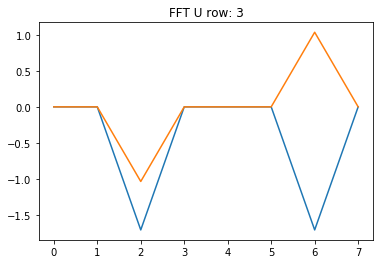

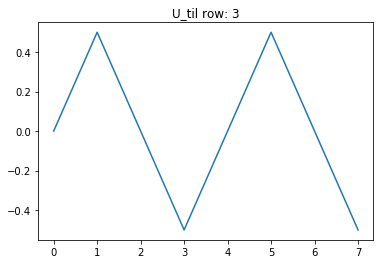

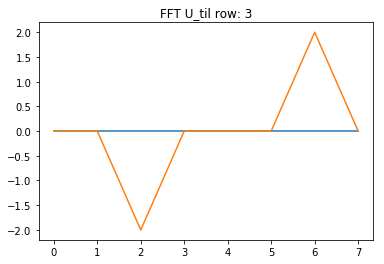

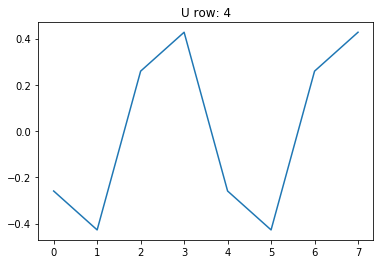

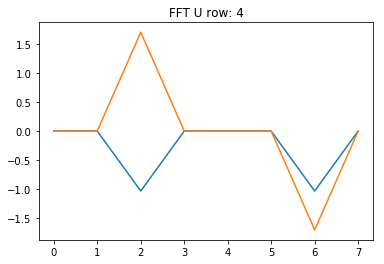

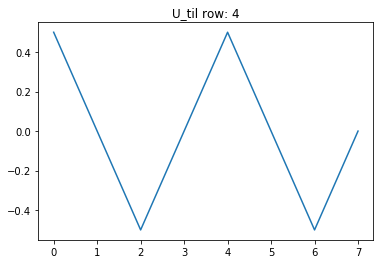

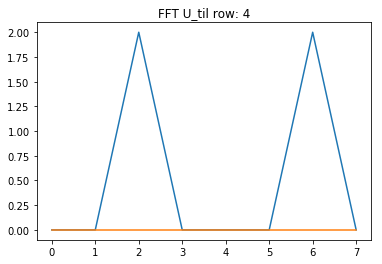

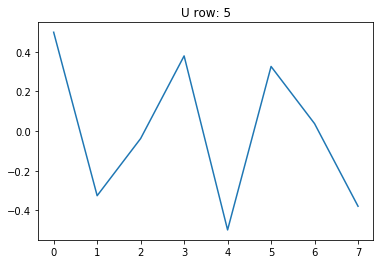

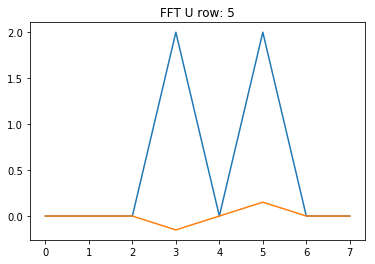

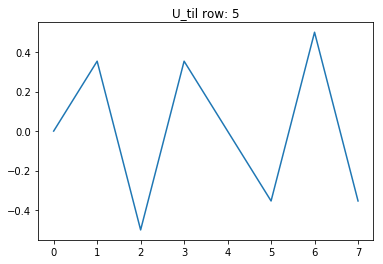

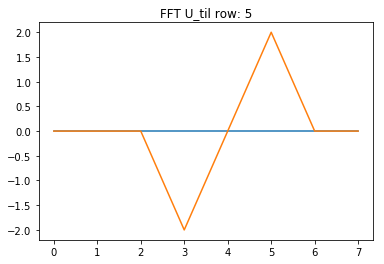

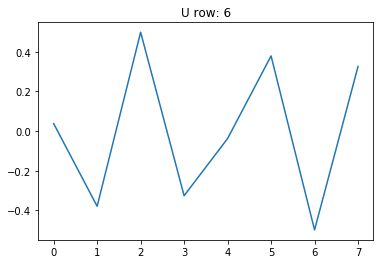

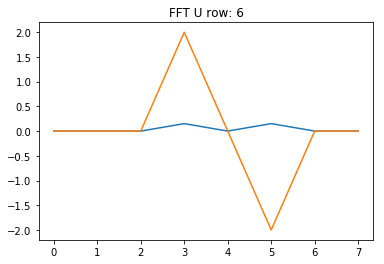

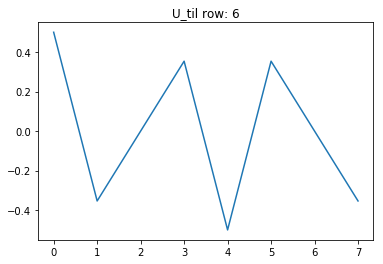

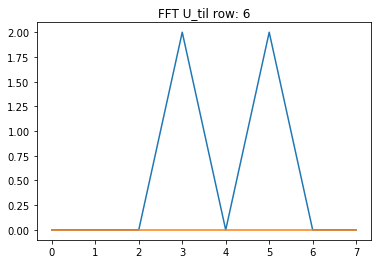

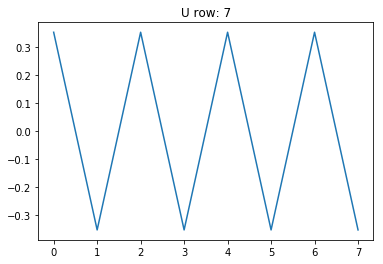

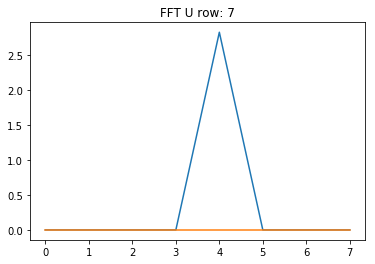

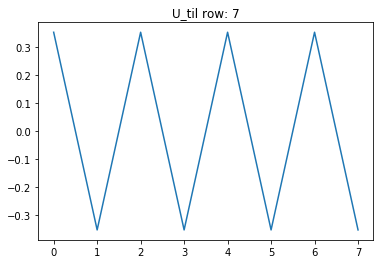

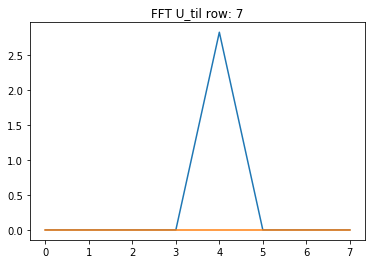

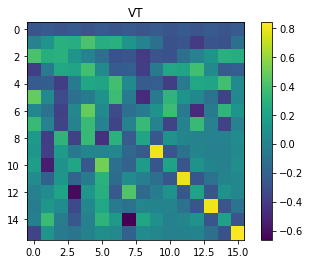

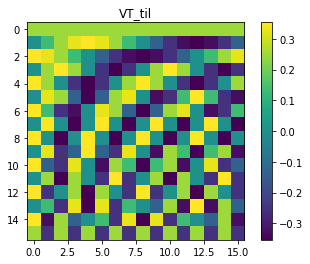

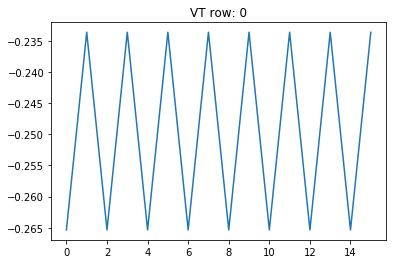

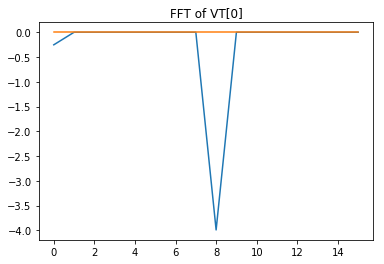

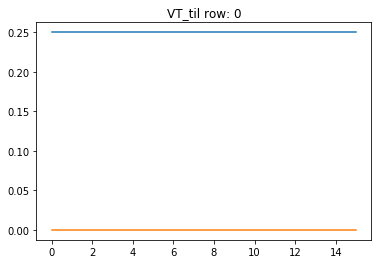

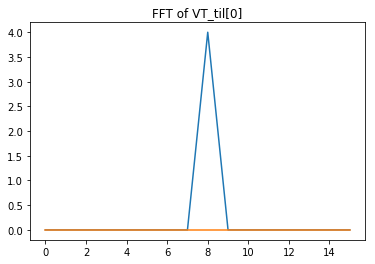

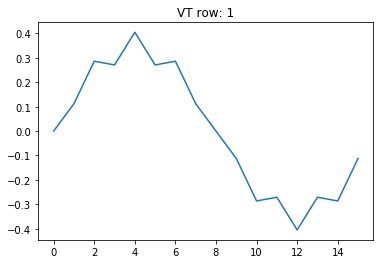

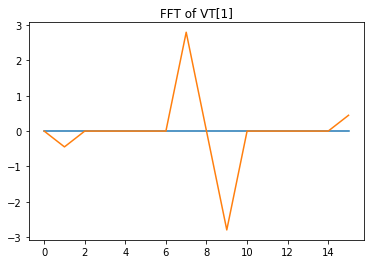

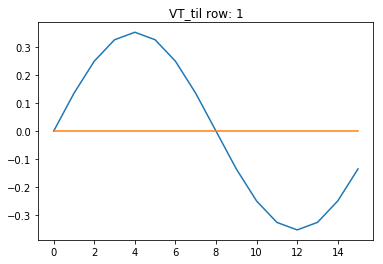

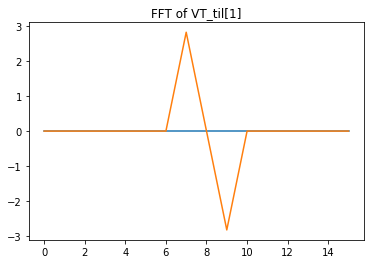

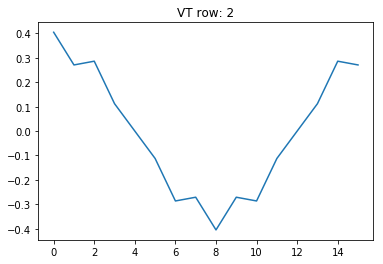

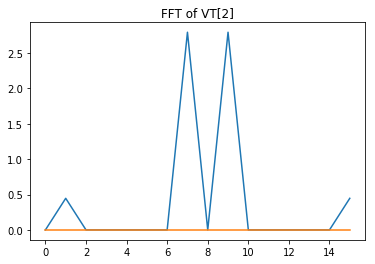

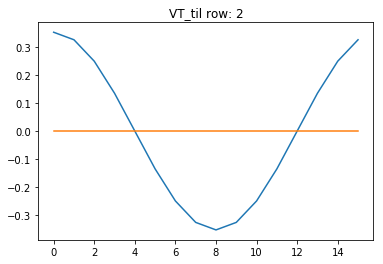

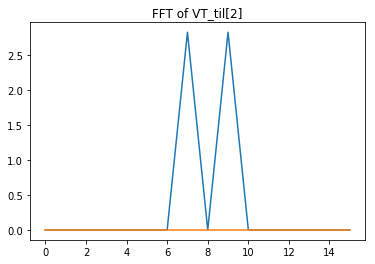

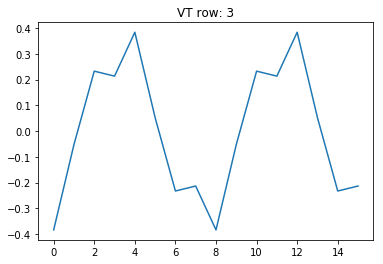

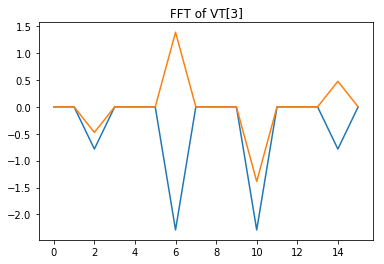

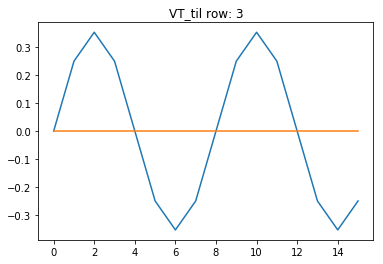

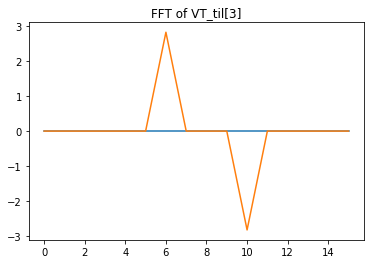

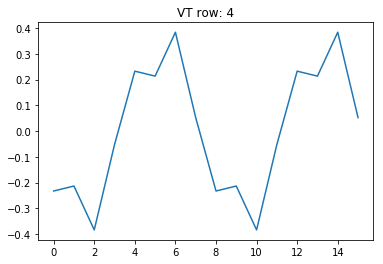

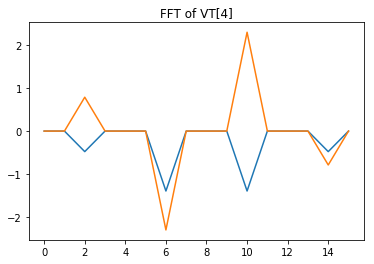

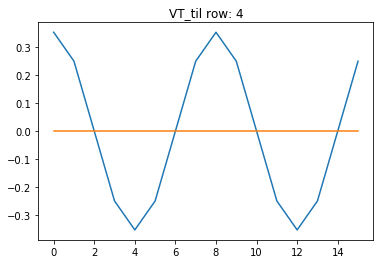

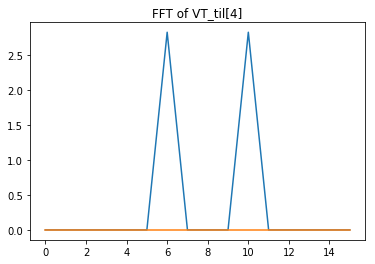

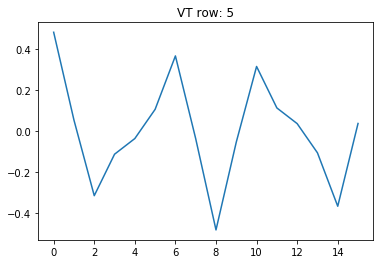

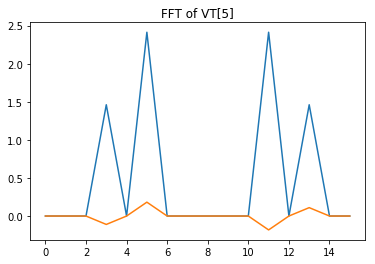

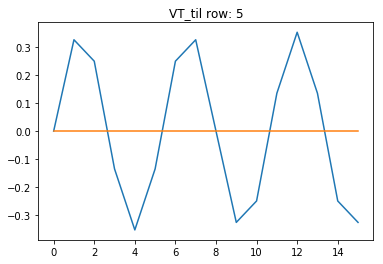

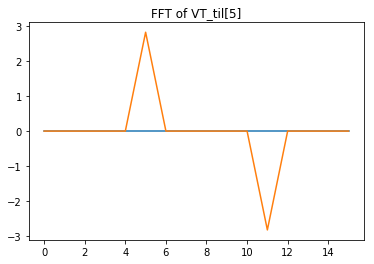

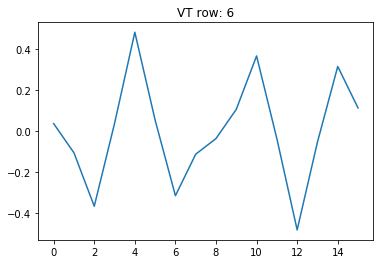

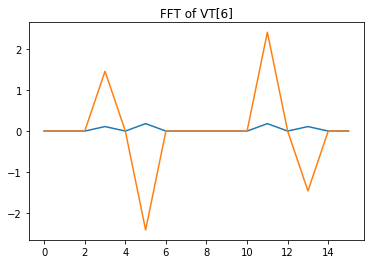

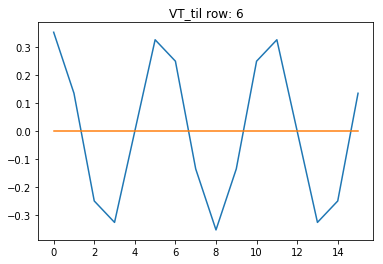

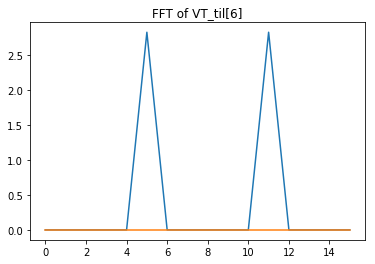

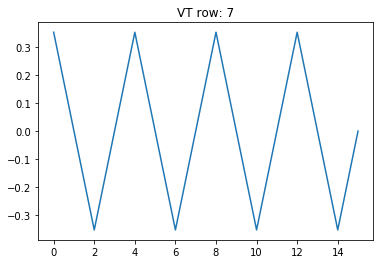

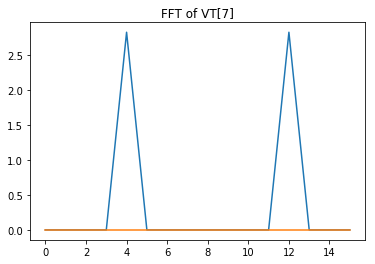

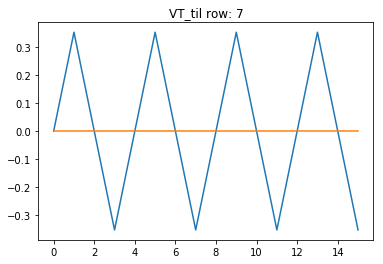

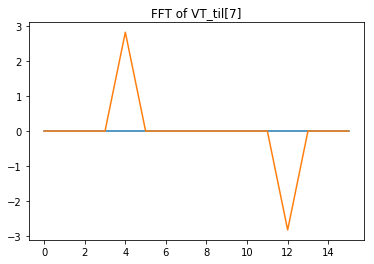

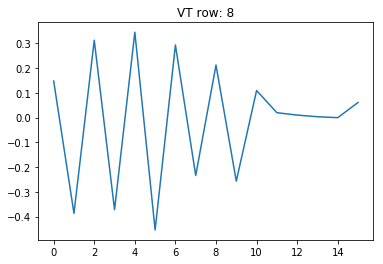

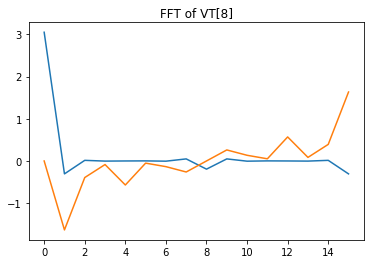

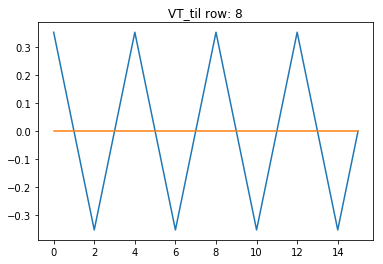

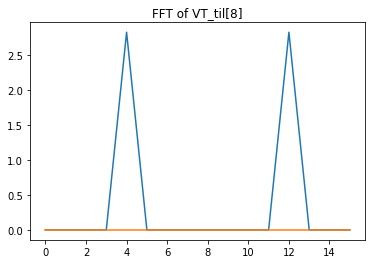

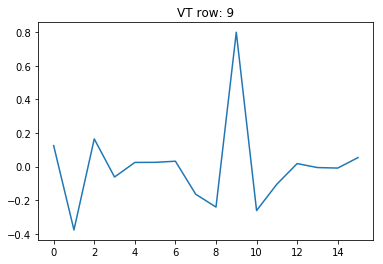

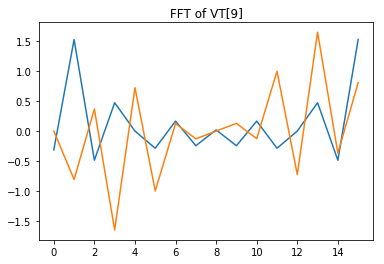

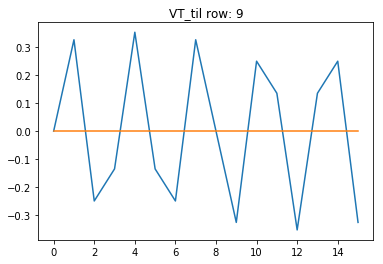

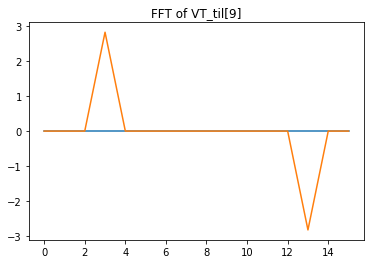

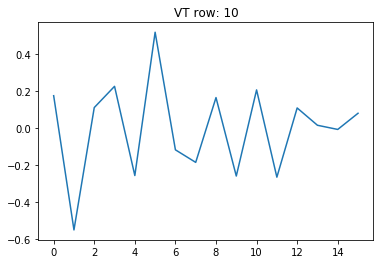

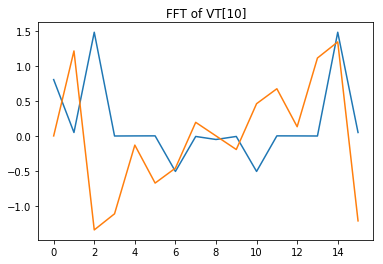

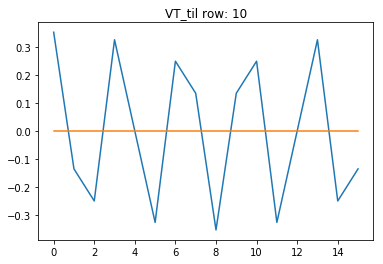

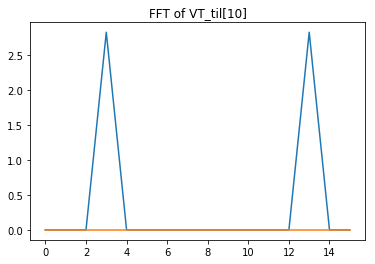

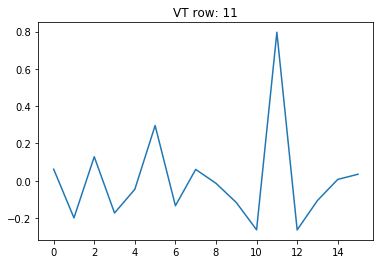

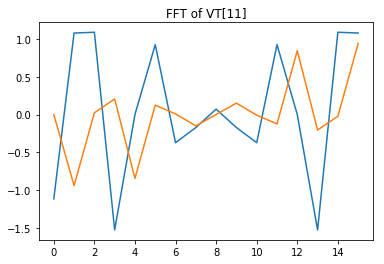

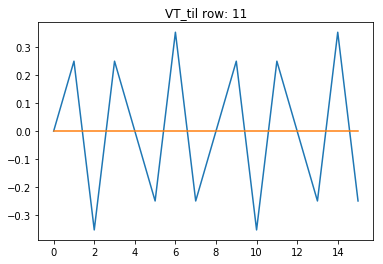

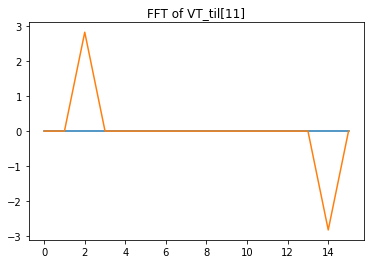

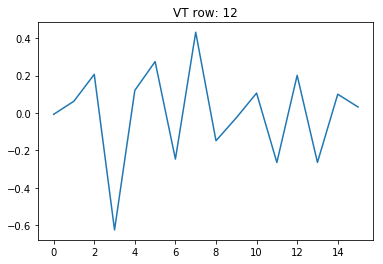

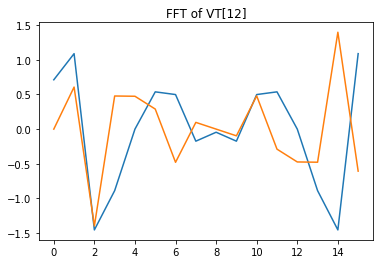

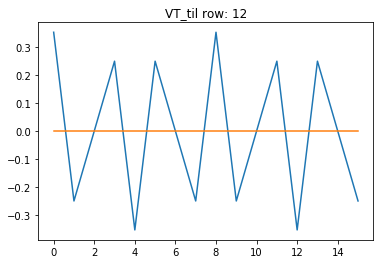

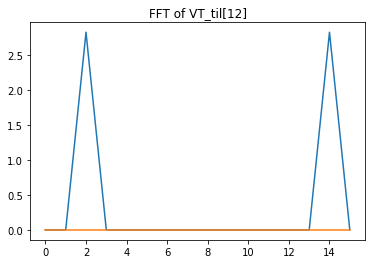

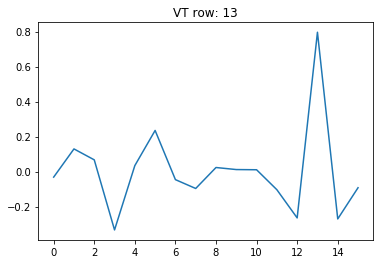

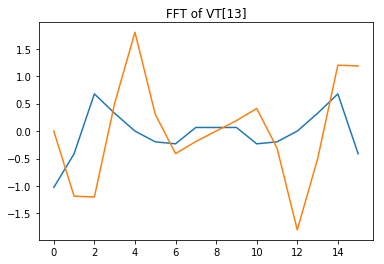

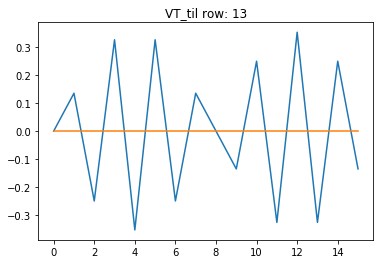

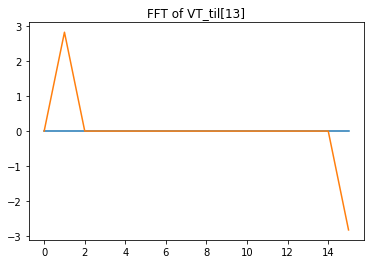

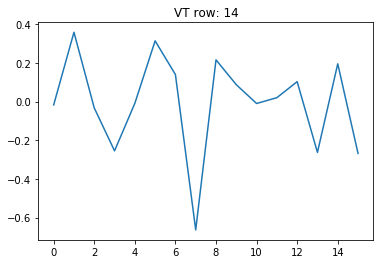

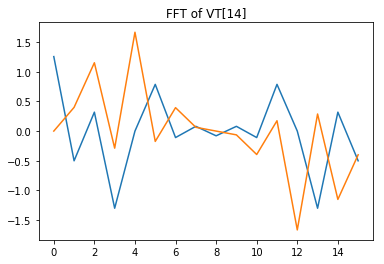

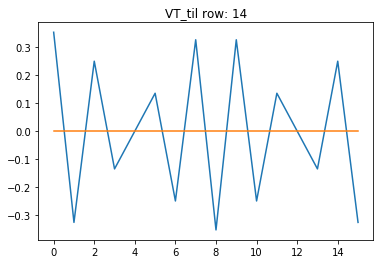

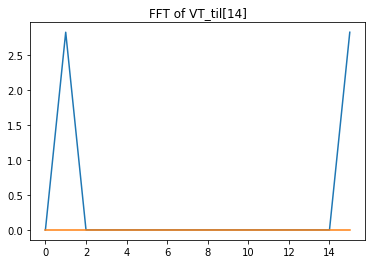

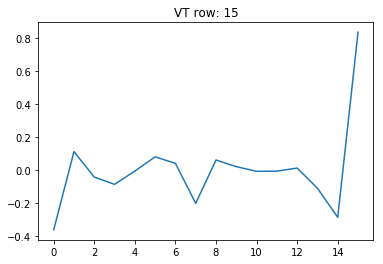

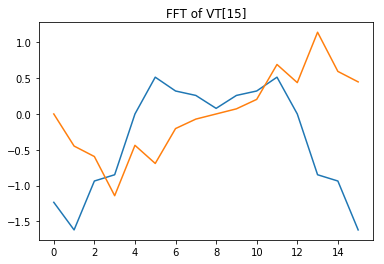

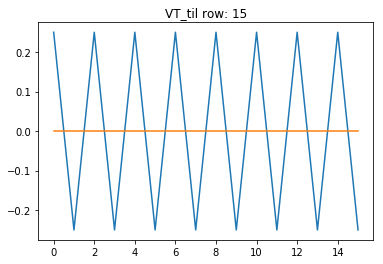

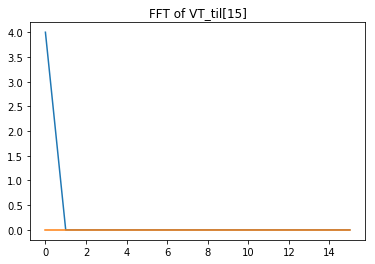

In [14]:
selection = np.eye(dimension)
selection = np.sqrt(2) * selection[:, :int(dimension/2)]
selection[int(dimension/2) - 1, int(dimension/2) - 1] = 1
selection[int(dimension/2), int(dimension/2) - 1] = 1

num_v = dimension
num_u = int(dimension/2)

# U_til = H @ eig_vec[:, :round(dimension/2)]

U_til = H @ eig_vec @ selection
VT_til = eig_vec.T

imshow(U, 'U')
imshow(eig_vec, 'eig_vec')
imshow(U_til, 'U_til')

for ii in range(num_u):   
    plt.figure()
    plt.plot(U[:, ii])
    plt.title(f'U row: {ii}')
    
    u_fft = np.fft.fft(U[:, ii])
    plt.figure()
    plt.plot(u_fft.real)
    plt.plot(u_fft.imag)
    plt.title(f'FFT U row: {ii}')
    
#     this = eig_vec[:, ii]
#     plt.figure()
#     plt.plot(this)
#     plt.title(f'eig_vec row: {ii}')
    
#     u_fft = np.fft.fft(this)
#     plt.figure()
#     plt.plot(u_fft.real)
#     plt.plot(u_fft.imag)
#     plt.title(f'FFT eig_vec row: {ii}')
    
    
    plt.figure()
    plt.plot(U_til[:, ii])
    plt.title(f'U_til row: {ii}')
    
    u_fft = np.fft.fft(U_til[:, ii])
    plt.figure()
    plt.plot(u_fft.real)
    plt.plot(u_fft.imag)
    plt.title(f'FFT U_til row: {ii}')


imshow(VT, 'VT')
imshow(VT_til.real, 'VT_til')

for ii in range(round(num_v)):
    plt.figure()
    plt.plot(VT[ii])
    plt.title(f'VT row: {ii}')
    
    v_fft = np.fft.fft(VT[ii])
    v_fft = np.fft.fftshift(v_fft)
    plt.figure()
    plt.plot(v_fft.real)
    plt.plot(v_fft.imag)
    plt.title(f'FFT of VT[{ii}]')
    
    plt.figure()
    plt.plot(VT_til[ii].real)
    plt.plot(VT_til[ii].imag)
    plt.title(f'VT_til row: {ii}')
    
    v_fft = np.fft.fft(VT_til[ii])
    v_fft = np.fft.fftshift(v_fft)
    plt.figure()
    plt.plot(v_fft.real)
    plt.plot(v_fft.imag)
    plt.title(f'FFT of VT_til[{ii}]')

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


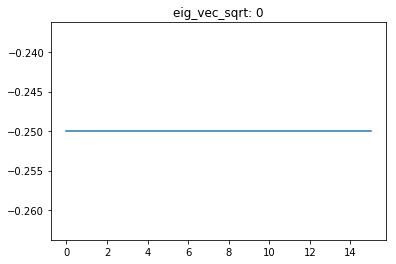

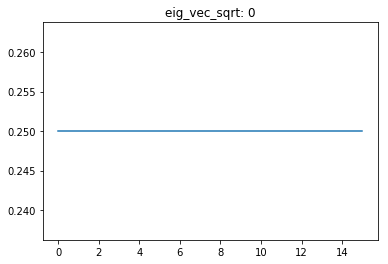

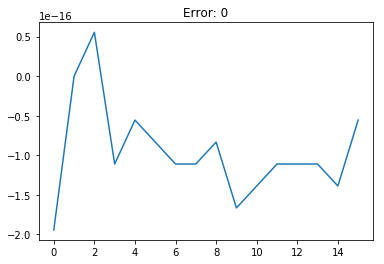

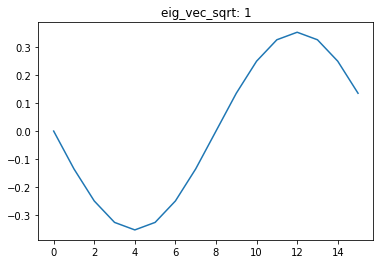

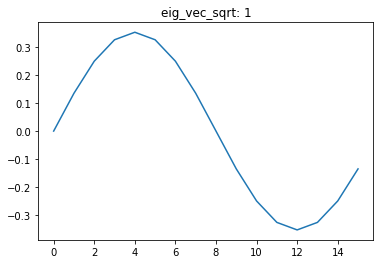

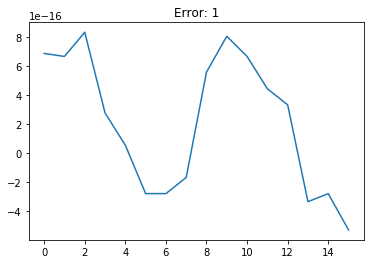

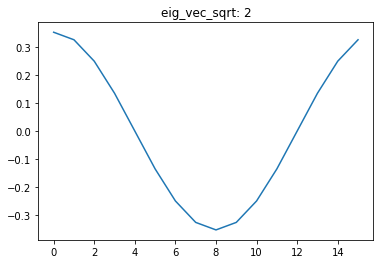

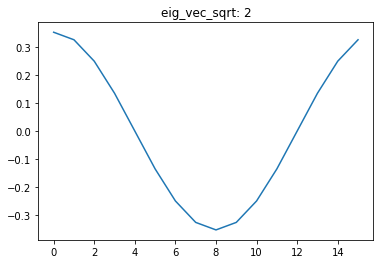

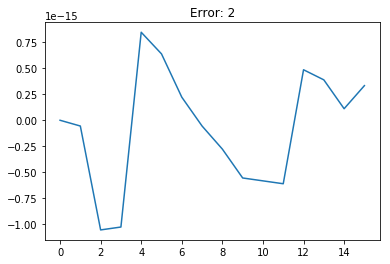

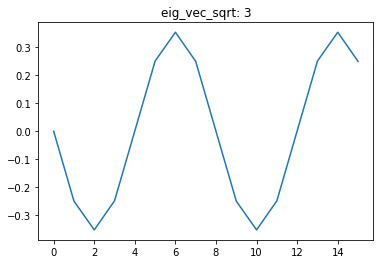

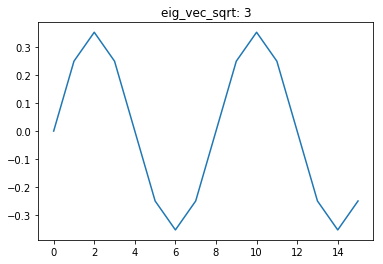

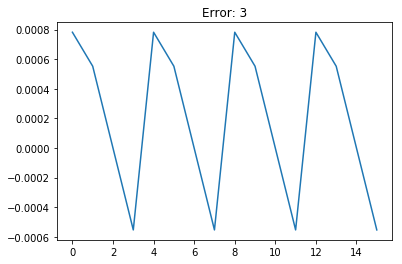

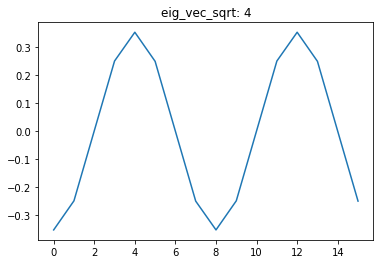

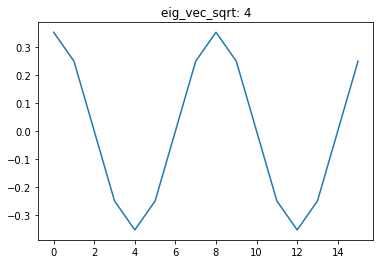

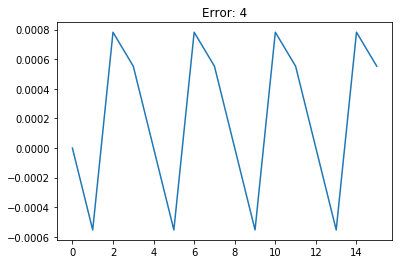

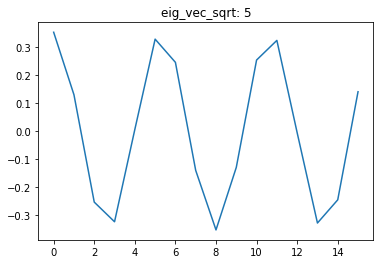

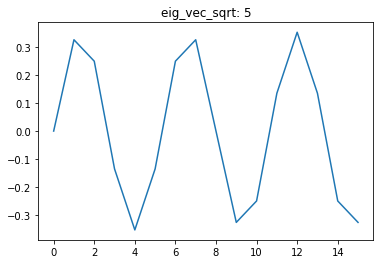

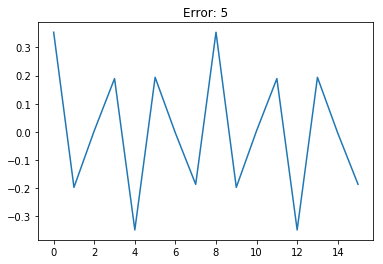

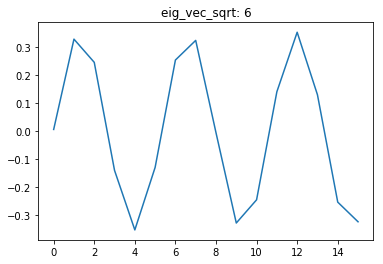

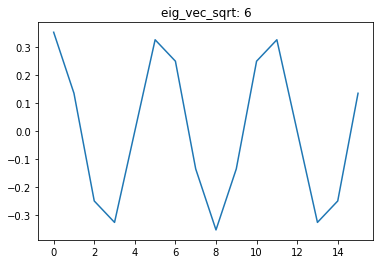

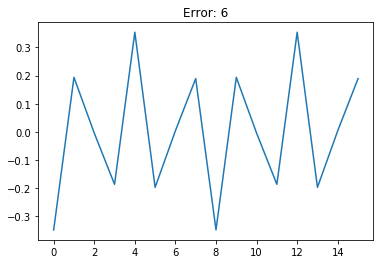

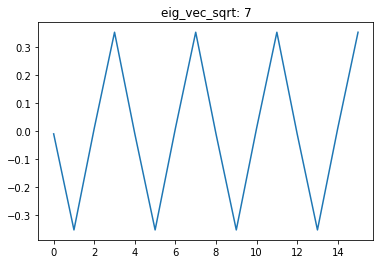

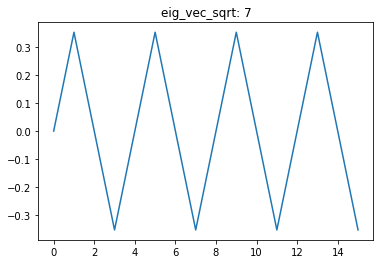

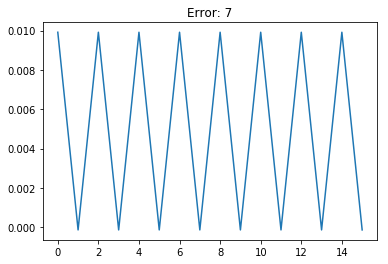

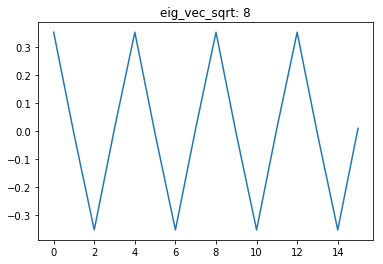

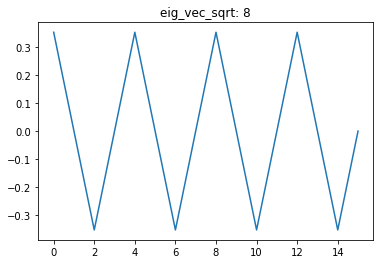

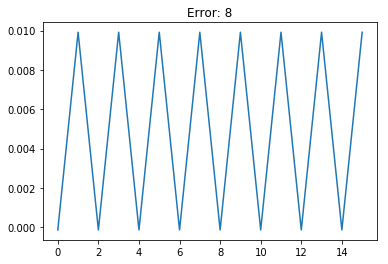

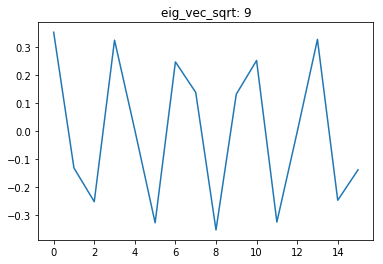

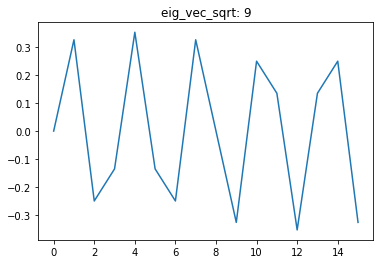

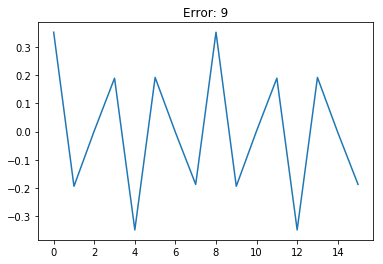

In [54]:
eig_val_sqrt, eig_vec_sqrt = np.linalg.eigh(P_sqrt)
eig_val_sqrt = eig_val_sqrt[::-1]
eig_vec_sqrt = eig_vec_sqrt[:, ::-1]

num = 10

for ii in range(round(num)):
    plt.figure()
    plt.plot(eig_vec_sqrt[:, ii])
    plt.title(f'eig_vec_sqrt: {ii}')
    
#     v_fft = np.fft.fft(eig_vec_sqrt[:, ii])
#     v_fft = np.fft.fftshift(v_fft)
#     plt.figure()
#     plt.plot(v_fft.real)
#     plt.plot(v_fft.imag)
#     plt.title(f'FFT of eig_vec[{ii}]')

    plt.figure()
    plt.plot(eig_vec[:, ii])
    plt.title(f'eig_vec_sqrt: {ii}')
    
#     v_fft = np.fft.fft(eig_vec[:, ii])
#     v_fft = np.fft.fftshift(v_fft)
#     plt.figure()
#     plt.plot(v_fft.real)
#     plt.plot(v_fft.imag)
#     plt.title(f'FFT of eig_vec[{ii}]')

    plt.figure()
    plt.plot(np.abs(eig_vec_sqrt[:, ii])
             - np.abs(eig_vec[:, ii]))
    plt.title(f'Error: {ii}')

In [57]:
this = H @ P_sqrt
print('Norm of H @ P_sqrt: ', np.linalg.norm(this, ord=2), '\n')

print('with svd')
print(np.linalg.norm(U[:, 0].T @ this))
print(np.linalg.norm(this @ VT[0, :]))
print(U[:, 0].T @ this @ VT[0, :])

print('with til')
print(np.linalg.norm(U_til[:, 0].T @ this))
print(np.linalg.norm(this @ VT_til[0, :]))
print(U_til[:, 0].T @ this @ VT_til[0, :])

Norm of H @ P_sqrt:  2.1924219102144327 

with svd
2.1924219102144322
2.1924219102144322
2.192421910214432
with til
2.1924219102144327
2.1880104184827096
2.1880104184827096


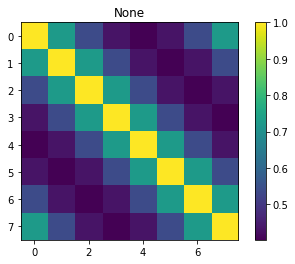

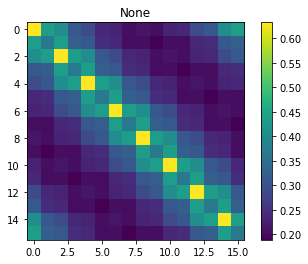

In [60]:
imshow(this @ this.T)
imshow(this.T @ this)

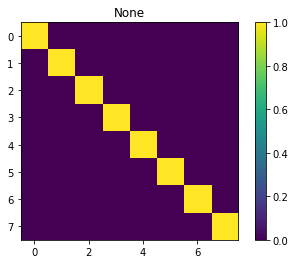

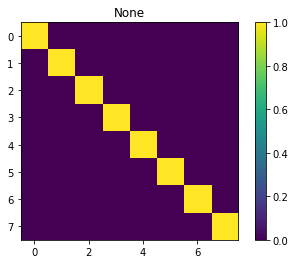

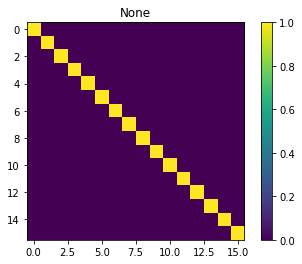

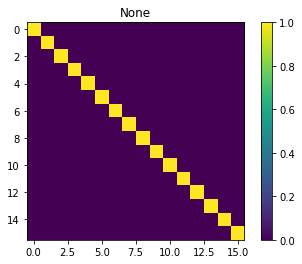

In [113]:
imshow(U_til.T @ U_til)
imshow(U_til @ U_til.T)
imshow(VT_til.T @ VT_til)
imshow(VT_til @ VT_til.T)

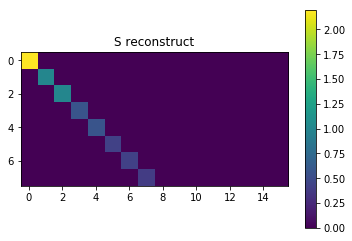

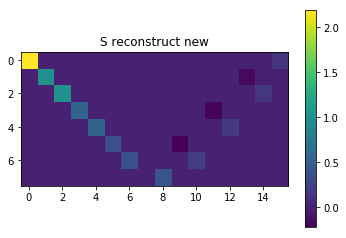

In [114]:
S_reconst_til = U_til.T @ H @ P_sqrt @ VT_til.T
S_reconst = U.T @ H @ P_sqrt @ VT.T
imshow(S_reconst, 'S reconstruct')
imshow(S_reconst_til, 'S reconstruct new')

In [187]:
%matplotlib inline

In [69]:
dimension = 100
rho0 = 10
dx = 1
H = np.eye(dimension)[::2]
y_size = H.shape[0]

rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
rho = rho*dx

In [70]:
eig_val, eig_vec, P = covariance.generate_circulant(
    dimension, dx, rho0, covariance.fft_sqd_exp_1d,
    return_Corr = True)
eig_val = eig_val * (eig_val.size/eig_val.sum())
eig_vec = eig_vec.real + eig_vec.imag
P = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T
P = P.real

R = np.eye(y_size)

returned = assimilate.transformation_matrices(
    H, eig_val_p=eig_val, eig_vec_p=eig_vec,
    R=R, return_Ts=True)

P_sqrt, P_inv_sqrt = returned[:2]
R_sqrt, R_inv_sqrt = returned[2:4]
U, S, VT = returned[4:7]
Tx, Tx_inv, Ty, Ty_inv = returned[7:]

Text(0.5,0.98,'Eigenvalues P')

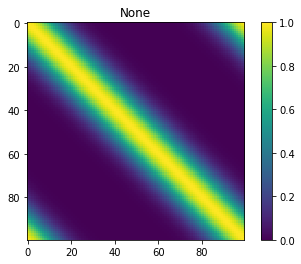

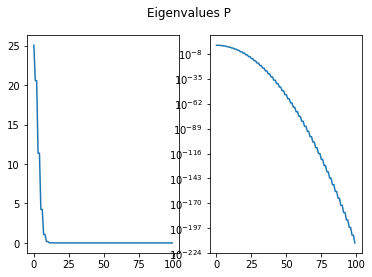

In [71]:
imshow(P, vmin=0)

fig, ax = plt.subplots(1, 2)
ax[0].plot(eig_val)
ax[1].semilogy(eig_val)
plt.suptitle('Eigenvalues P')

Text(0.5,0.98,'Singular values of H @ P_sqrt')

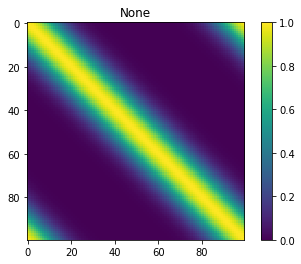

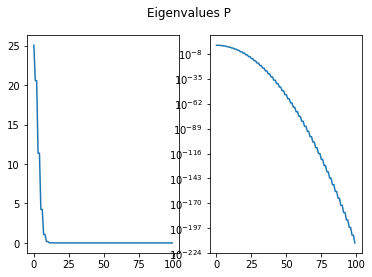

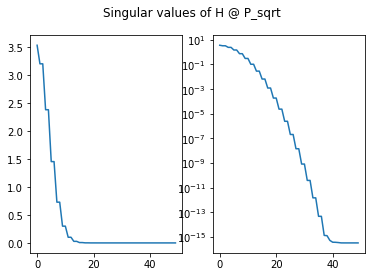

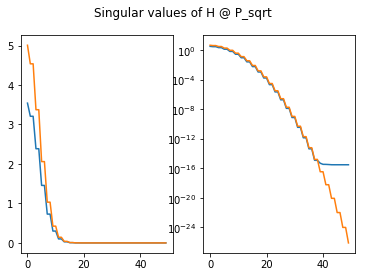

In [72]:
imshow(P, vmin=0)

fig, ax = plt.subplots(1, 2)
ax[0].plot(eig_val)
ax[1].semilogy(eig_val)
plt.suptitle('Eigenvalues P')

fig, ax = plt.subplots(1, 2)
ax[0].plot(np.diag(S))
ax[1].semilogy(np.diag(S))
plt.suptitle('Singular values of H @ P_sqrt')


fig, ax = plt.subplots(1, 2)
ax[0].plot(np.diag(S))
ax[0].plot(np.sqrt(eig_val[:int(dimension/2)]))
ax[1].semilogy(np.diag(S))
ax[1].semilogy(np.sqrt(eig_val[:int(dimension/2)]))
plt.suptitle('Singular values of H @ P_sqrt')

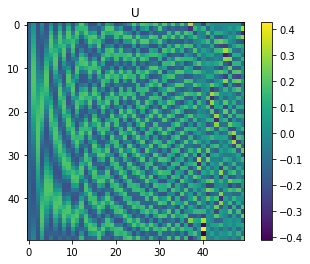

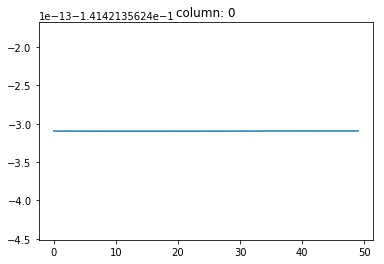

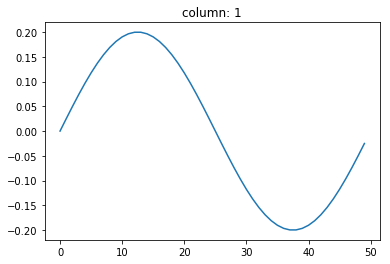

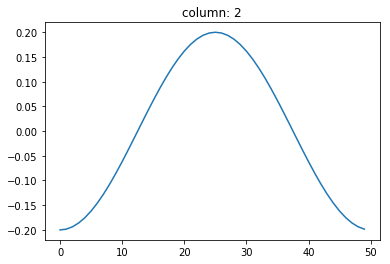

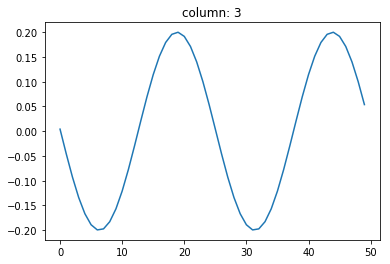

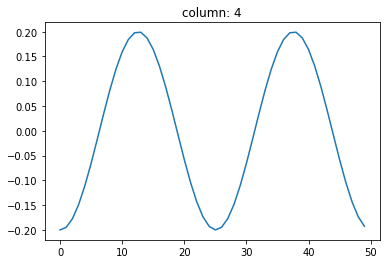

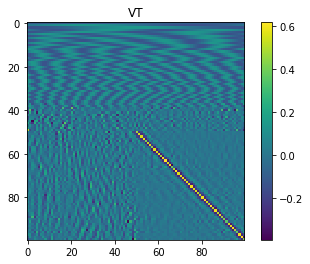

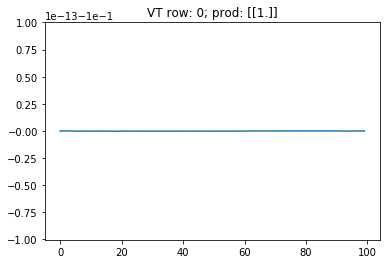

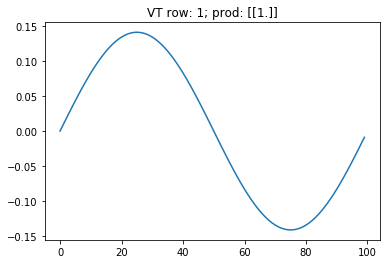

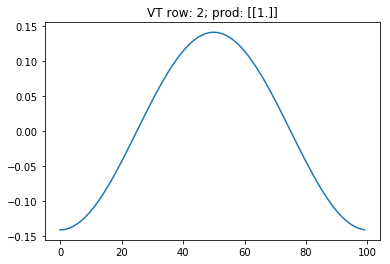

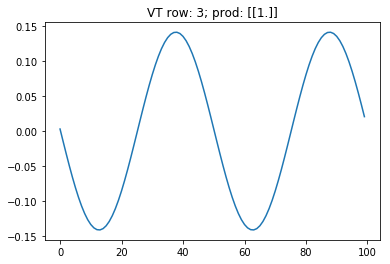

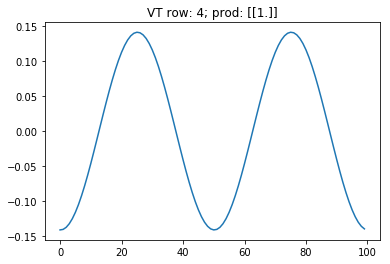

In [193]:
imshow(U, 'U')

for ii in range(5):   
    plt.figure()
    plt.plot(U[:, ii])
    plt.title(f'column: {ii}')
    
imshow(VT, 'VT')

for ii in range(5):
    x = np.arange(dimension)/dimension*2*np.pi
    truth = np.cos(x*ii)
    prod = VT[ii][None, :] @ VT[ii][None, :].conj().T
    plt.figure()
    plt.plot(VT[ii])
    plt.title(f'VT row: {ii}; prod: {prod}')